**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

In [2]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading the training data (X+y)

train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [4]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [5]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [6]:
X.shape, y.shape

((27455, 784), (27455,))

In [7]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [8]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [9]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [10]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [11]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [12]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [13]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [14]:
X_train[0].dtype

tf.float64

In [15]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x1906e11f1f0>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0]))

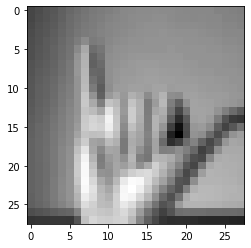

In [16]:
plt.imshow(X[0], cmap='gray'), y[2]

In [17]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # Interupts training when there is no progress

In [20]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.7405 - accuracy: 0.7716

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 25s 21ms/step - loss: 0.7405 - accuracy: 0.7716 - val_loss: 0.0184 - val_accuracy: 0.9988
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9977

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 16s 21ms/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 6.6632e-04 - val_accuracy: 1.0000
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 4.3761e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 4.3748e-04 - accuracy: 1.0000 - val_loss: 2.7369e-04 - val_accuracy: 1.0000
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 2.0137e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 16s 20ms/step - loss: 2.0132e-04 - accuracy: 1.0000 - val_loss: 1.4363e-04 - val_accuracy: 1.0000
Epoch 5/20
780/782 [============================>.] - ETA: 0s - loss: 9.4086e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 9.4030e-05 - accuracy: 1.0000 - val_loss: 7.0379e-05 - val_accuracy: 1.0000
Epoch 6/20
780/782 [============================>.] - ETA: 0s - loss: 5.0396e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 5.0389e-05 - accuracy: 1.0000 - val_loss: 4.1547e-05 - val_accuracy: 1.0000
Epoch 7/20
782/782 [==============================] - ETA: 0s - loss: 2.9544e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 2.9544e-05 - accuracy: 1.0000 - val_loss: 2.3519e-05 - val_accuracy: 1.0000
Epoch 8/20
779/782 [============================>.] - ETA: 0s - loss: 1.8174e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 16s 21ms/step - loss: 1.8149e-05 - accuracy: 1.0000 - val_loss: 1.5866e-05 - val_accuracy: 1.0000
Epoch 9/20
780/782 [============================>.] - ETA: 0s - loss: 1.0699e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.0692e-05 - accuracy: 1.0000 - val_loss: 8.8468e-06 - val_accuracy: 1.0000
Epoch 10/20
778/782 [============================>.] - ETA: 0s - loss: 6.2712e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 6.2655e-06 - accuracy: 1.0000 - val_loss: 5.9392e-06 - val_accuracy: 1.0000
Epoch 11/20
781/782 [============================>.] - ETA: 0s - loss: 3.3291e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 3.3284e-06 - accuracy: 1.0000 - val_loss: 3.0666e-06 - val_accuracy: 1.0000
Epoch 12/20
781/782 [============================>.] - ETA: 0s - loss: 2.1350e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 2.1343e-06 - accuracy: 1.0000 - val_loss: 2.1152e-06 - val_accuracy: 1.0000
Epoch 13/20
782/782 [==============================] - ETA: 0s - loss: 1.3007e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.3007e-06 - accuracy: 1.0000 - val_loss: 1.5877e-06 - val_accuracy: 1.0000
Epoch 14/20
778/782 [============================>.] - ETA: 0s - loss: 7.9804e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 7.9762e-07 - accuracy: 1.0000 - val_loss: 1.1102e-06 - val_accuracy: 1.0000
Epoch 15/20
781/782 [============================>.] - ETA: 0s - loss: 5.0215e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 5.0233e-07 - accuracy: 1.0000 - val_loss: 4.9291e-07 - val_accuracy: 1.0000
Epoch 16/20
780/782 [============================>.] - ETA: 0s - loss: 3.3197e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 3.3198e-07 - accuracy: 1.0000 - val_loss: 4.1293e-07 - val_accuracy: 1.0000
Epoch 17/20
781/782 [============================>.] - ETA: 0s - loss: 2.0277e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 2.0276e-07 - accuracy: 1.0000 - val_loss: 2.3808e-07 - val_accuracy: 1.0000
Epoch 18/20
777/782 [============================>.] - ETA: 0s - loss: 1.3761e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 1.3735e-07 - accuracy: 1.0000 - val_loss: 1.6723e-07 - val_accuracy: 1.0000
Epoch 19/20
782/782 [==============================] - 14s 17ms/step - loss: 9.8567e-08 - accuracy: 1.0000 - val_loss: 4.6305e-06 - val_accuracy: 1.0000
Epoch 20/20
782/782 [==============================] - 13s 16ms/step - loss: 0.0899 - accuracy: 0.9793 - val_loss: 3.2959e-04 - val_accuracy: 1.0000


In [22]:
history.history # Contains the training related information for each epoch

{'loss': [0.7405094504356384,
  0.011254285462200642,
  0.00043748237658292055,
  0.00020131551718804985,
  9.403005242347717e-05,
  5.038879316998646e-05,
  2.954396404675208e-05,
  1.814886854845099e-05,
  1.0692021533031948e-05,
  6.265496722335229e-06,
  3.3283540687989444e-06,
  2.1343234948290046e-06,
  1.300704980167211e-06,
  7.97622817572119e-07,
  5.023313178753597e-07,
  3.3198188020833186e-07,
  2.0276041823308333e-07,
  1.3734799608755566e-07,
  9.856679383801747e-08,
  0.08989246934652328],
 'accuracy': [0.77156001329422,
  0.9977200031280518,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9792799949645996],
 'val_loss': [0.01839500479400158,
  0.0006663150852546096,
  0.0002736948081292212,
  0.0001436274469597265,
  7.037875184323639e-05,
  4.154695488978177e-05,
  2.351945840928238e-05,
  1.586629332450684e-05,
  8.846803211781662e-06,
  5.9392446019046474e-06,
  3.0666080874652835e-06,
  2.115

In [19]:
best_model = keras.models.load_model('initial-end-to-end') # Model with best set of parameters not necessarily the model at the last epoch of training

In [20]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [21]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [22]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [23]:
y_test = label_binarizer.transform(y_test)

In [24]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 27s 12ms/step - loss: 116.5061 - accuracy: 0.9034


[116.50614166259766, 0.9033742547035217]

Accuracy: 90%

In [71]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [72]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'])

225/225 [==============================] - 2s 9ms/step - loss: 116.5061 - accuracy: 0.9034
Loss: 116.506 Accuracy: 0.903


### Converting Images to a Sentence

In [98]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [99]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [97]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [82]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [83]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [84]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 63ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [85]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 54ms/step
sign language


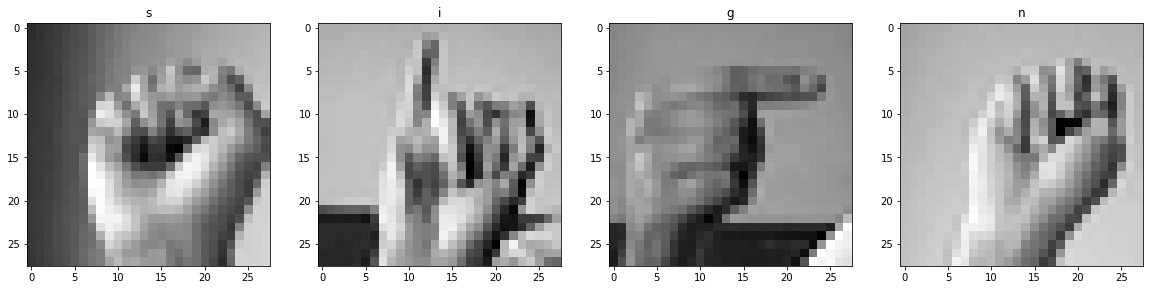

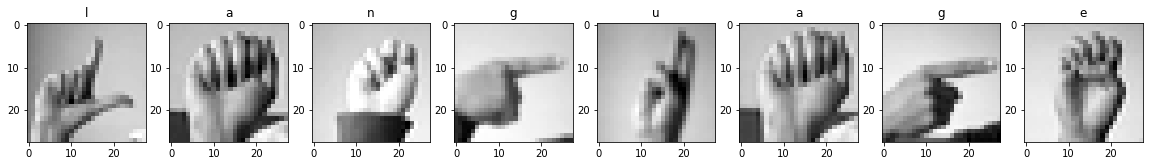

In [86]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [116]:
def test_on_sentence(model, sentence, X_test, y_test, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 37ms/step
The actual sentence is "sign language"
The predicted sentence is "sign languags"


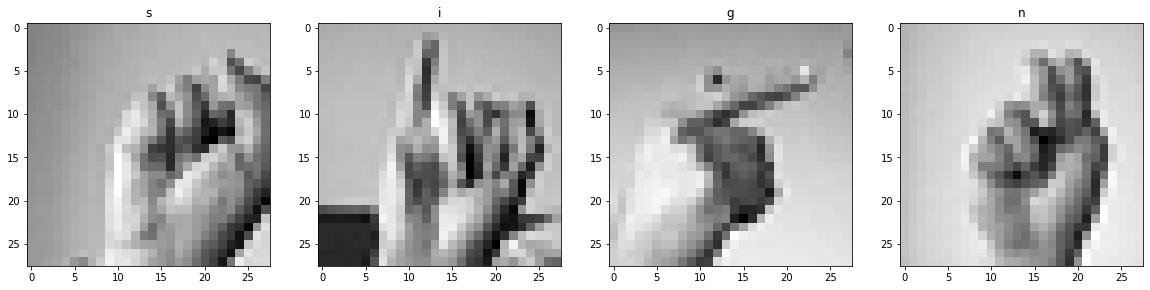

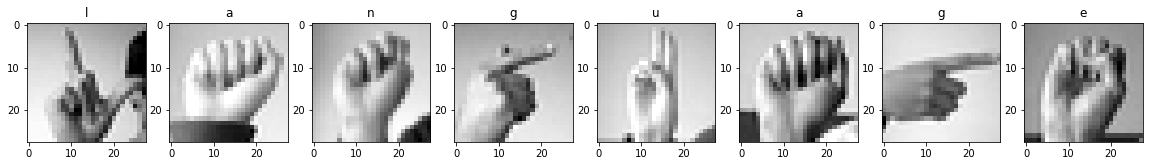

In [117]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'])